In [3]:
import sys
sys.path.append('../')
from src import load_dataset

import numpy as np
import matplotlib.pyplot as plt

import codecs, re, os.path

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valinquish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Données reconnaissance du locuteur (Chirac/Mitterrand)

In [8]:
alltxts, alllabs = load_dataset()

print(f"Nombre de phrases [classes] : {len(alltxts)} [{len(alllabs)}]")
print(f"[Classe : {alllabs[0]}]", alltxts[0].rstrip())
print(f"[Classe : {alllabs[-1]}]", alltxts[-1].rstrip())
print(f"[Classe : {alllabs[12]}]", alltxts[12].rstrip())

print("Nombre de phrases prononcés par Chirac :", np.sum(np.array(alllabs) == 1), np.sum(np.array(alllabs) == 1) / len(alltxts) * 100, "%")
print("Nombre de phrases prononcés par Mitterand :", np.sum(np.array(alllabs) == -1), np.sum(np.array(alllabs) == -1) / len(alltxts) * 100, "%")

Nombre de phrases [classes] : 57413 [57413]
[Classe : 1]  Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.
[Classe : 1]  Je compte sur vous.
[Classe : -1]  C'est vrai qu'il y a très souvent dans notre pays un refus de regarder droit devant soi, comme un souhait d'en rester là, une certaine peur du changement, c'est vrai.
Nombre de phrases prononcés par Chirac : 49890 86.89669587027329 %
Nombre de phrases prononcés par Mitterand : 7523 13.103304129726718 %


- 1 correspond à Chirac (C)
- -1 correspond à Mitterand (M)

Jeu de données très déséquilibré : preque 9 phrases sur 10 sont de Chirac, très facile d'avoir un très bon score de prédiction !

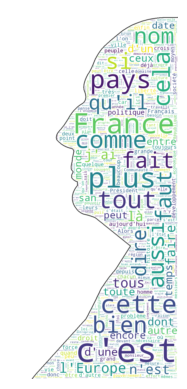

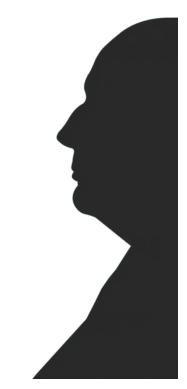

In [13]:
from os import path
from PIL import Image
import os
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# Read the whole text.
d = "../reports/figures/"
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Mitterrand_Portrait.png"))

stopwords_list = set(STOPWORDS)
for word in stopwords.words("french"):
    stopwords_list.add(word)

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Mitterrand_Portrait_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

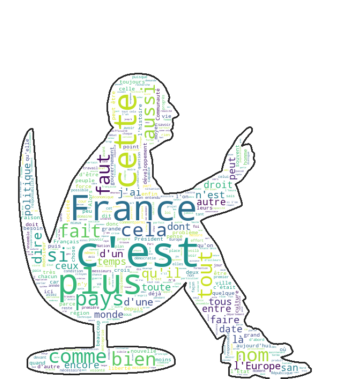

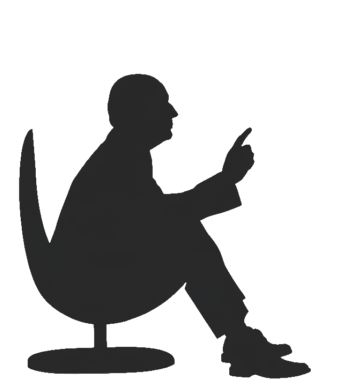

In [14]:
# Read the whole text.
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Mitterrand_Assis.png"))

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Mitterrand_Assis_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

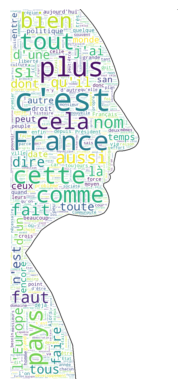

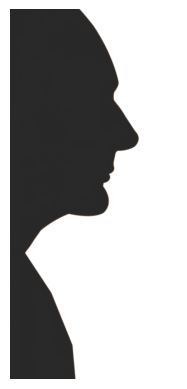

In [15]:
# Read the whole text.
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Chirac_Portrait.png"))

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Chirac_Portrait_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

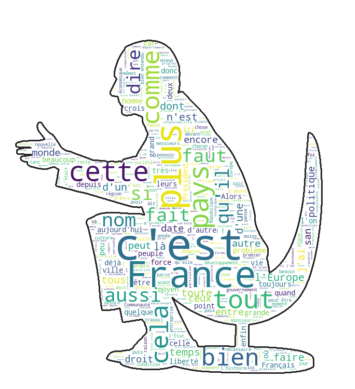

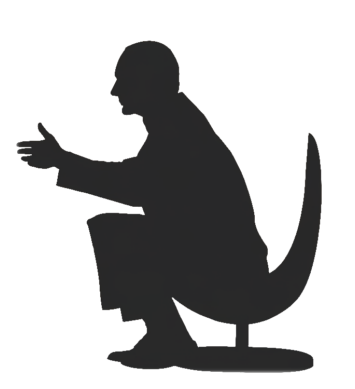

In [16]:
# Read the whole text.
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Chirac_Assis.png"))

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Chirac_Assis_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

STOPWORDS

In [ ]:
from collections import Counter

wc = Counter()
for text in alltxts:
    wc.update(text.split(" "))

freq = [f for w, f in wc.most_common(1000)]

# plt.style.use("ggplot")
plt.style.use("default")

plt.plot(np.array(freq[:200]) / np.sum(freq) * 100, "b-o")
plt.ylabel("fréquence (%)")
plt.title("Répartition des mots")
plt.show()
print(wc.most_common(20))

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords.words("french"))
X = vectorizer.fit_transform(alltxts)

# Données classification de sentiments (films)

In [ ]:
def load_movies(path2data):  # 1 classe par répertoire
    alltxts = []  # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data):  # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data + cl):
            txt = open(path2data + cl + "/" + f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt += 1  # chg répertoire = cht classe
    return alltxts, labs

In [ ]:
path = "datasets/movies1000/"
alltxts, alllabs = load_movies(path)

In [ ]:
print(len(alltxts), len(alllabs))
print(f"[Classe : {alllabs[0]}]", alltxts[0][:256].rstrip())
print(f"[Classe : {alllabs[-1]}]", alltxts[-1][:256].rstrip())

# A) Transformation paramétrique du texte (pre-traitements)

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

# B) Extraction du vocabulaire (BoW)

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendrent? Quels sont les avantages et les inconvénients des ces variantes?**

# C) Modèles de Machine Learning

## 1) Métriques d'évaluation 

Il faudra utiliser des métriques d'évaluation pertinentes suivant la tâche et l'équilibrage des données : 
- Accuracy
- Courbe ROC, AUC, F1-score

## 2) Variantes sur les stratégies d'entraînement

- **Sur-apprentissage**. Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente).

 <br>
- **Equilibrage des données**. Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (*balance* en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes?
Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.<BR>
   $\Rightarrow$ A vous de jouer pour cette technique
1. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:
soit une fonction $\Delta$ mesurant les écarts entre $f(x_i)$ et $y_i$ 
$$C = \sum_i  \alpha_i \Delta(f(x_i),y_i), \qquad \alpha_i = \left\{
\begin{array}{ll}
1 & \text{si } y_i \in \text{classe majoritaire}\\
B>1 & \text{si } y_i \in \text{classe minoritaire}\\
\end{array} \right.$$
<BR>
   $\Rightarrow$ Les SVM et d'autres approches sklearn possèdent des arguments pour régler $B$ ou $1/B$... Ces arguments sont utiles mais pas toujours suffisant.
1. Courbe ROC et modification du biais. Une fois la fonction $\hat y = f(x)$ apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions $\hat y$ sont dans une classe, on va introduire $b$ dans $\hat y = f(x) + b$ et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin.
Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.

**Note:** certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting que vous verrez l'an prochain.


## 3) Estimer les performances de généralisation d'une méthodes
**Ce sera l'enjeu principal du projet : vous disposez d'un ensemble de données, et vous évaluerez les performances sur un ensemble de test auquel vous n'avez pas accès. Il faut donc être capable d'estimer les performances de généralisation du modèles à partir des données d'entraînement.**


Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

- Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?
- La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple *split*?
- La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)?